In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, ttest_ind, levene



In [2]:
data = pd.read_csv("student-mat.csv", delimiter=';')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data["Mjob"].unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [4]:

# Define scores for various attributes
occupation_scores = {
    'teacher': 3,
    'health': 4,
    'services': 2,
    'at_home': 1,
    'other': 1
}

address_scores = {
    'U': 2,
    'R': 1
}

famsize_scores = {
    'GT3': 1,
    'LE3': 2
}

pstatus_scores = {
    'T': 2,
    'A': 1
}

paid_scores = {
    'yes': 2,
    'no': 1
}

internet_scores = {
    'yes': 2,
    'no': 1
}

traveltime_scores = {
    1: 4,
    2: 3,
    3: 2,
    4: 1
}

nursery_scores = {
    'yes': 2,
    'no': 1
}



# Define a function to compute SES score for each student
def cal_ses_score(row):
    score = (row['Medu'] + row['Fedu'] +
             occupation_scores[row['Mjob']] + occupation_scores[row['Fjob']] +
             address_scores[row['address']] + famsize_scores[row['famsize']] +
             pstatus_scores[row['Pstatus']] + paid_scores[row['paid']] +
             internet_scores[row['internet']] + traveltime_scores[row['traveltime']] + 
             nursery_scores[row['nursery']] + row['famrel'])
    return score



In [5]:
data['SES_Score'] = data.apply(cal_ses_score, axis=1)

# Group students based on the SES scores
ses_labels = ['Low SES', 'Lower-Middle SES', 'Upper-Middle SES', 'High SES']
data['SES_Group'] = pd.qcut(data['SES_Score'], q=4, labels=ses_labels)

# Save the updated DataFrame to a new CSV file
data.to_csv("student-mat-ses-grouped.csv", index=False)

print("Data saved successfully with SES groups!")


Data saved successfully with SES groups!


In [11]:
data["SES_Score"].unique()

array([27, 22, 24, 30, 26, 31, 25, 29, 33, 23, 34, 28, 36, 32, 21, 19, 20,
       37, 18, 35, 17])

In [10]:
def assign_ses_group(score):
    if 32 <= score <= 37:
        return "High SES"
    elif 28 <= score <= 31:
        return "Upper-Middle SES"
    elif 23 <= score <= 27:
        return "Lower-Middle SES"
    else:
        return "Low SES"

data['SES_Group'] = data['SES_Score'].apply(assign_ses_group)

In [12]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,SES_Score,SES_Group,SES_Quartile
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,27,Upper-Middle SES,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,Low SES,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,24,Lower-Middle SES,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,30,High SES,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,26,Lower-Middle SES,1


## Summary Statistics

In [16]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,SES_Score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,26.192405
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.725811
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,17.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,23.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,26.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,29.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,37.000000


* The average age of students is approximately 16.7 years, with a standard deviation of about 1.28, indicating a relatively narrow age range.
* The median education level for both mothers and fathers is some secondary education (value of 2).
* Students, on average, have less than 2 hours of travel time to school and spend 2 to 5 hours on study time weekly.
* On average, students have less than one prior failure, indicating that most students have not failed a class more than once.
* The quality of family relationships (famrel), free time after school (freetime), and going out with friends (goout) have averages around 3 or 4 on a scale from 1 to 5.
* Average workday alcohol consumption (Dalc) is low, while weekend consumption (Walc) is slightly higher.
* The health status is relatively good, with an average of 3.55.
* Absences vary widely, with a standard deviation of 8, suggesting some students miss significantly more school than others.
* The average final grade (G3) is about 10.42 out of 20, which might indicate a moderate performance level among the students.
* The SES score has an average of 26.19, with a standard deviation of 3.73, showing some variability in the socioeconomic status among students.


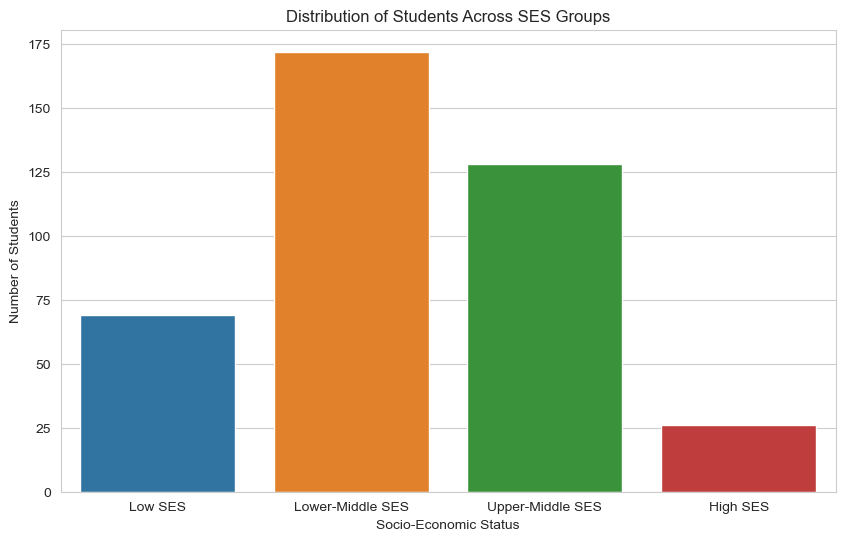

In [14]:
sns.set_style("whitegrid")

# Plot the distribution of students across SES groups
plt.figure(figsize=(10, 6))
sns.countplot(x='SES_Group', data=data, order=ses_labels)
plt.title('Distribution of Students Across SES Groups')
plt.ylabel('Number of Students')
plt.xlabel('Socio-Economic Status')
plt.show()


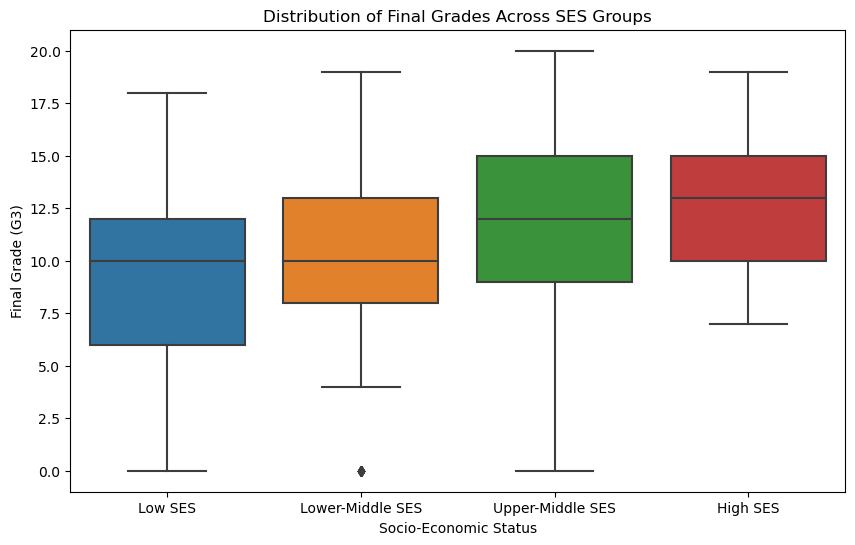

In [12]:
# Box plot to visualize the final grades distribution across SES groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='SES_Group', y='G3', data=data, order=ses_labels)
plt.title('Distribution of Final Grades Across SES Groups')
plt.ylabel('Final Grade (G3)')
plt.xlabel('Socio-Economic Status')
plt.show()

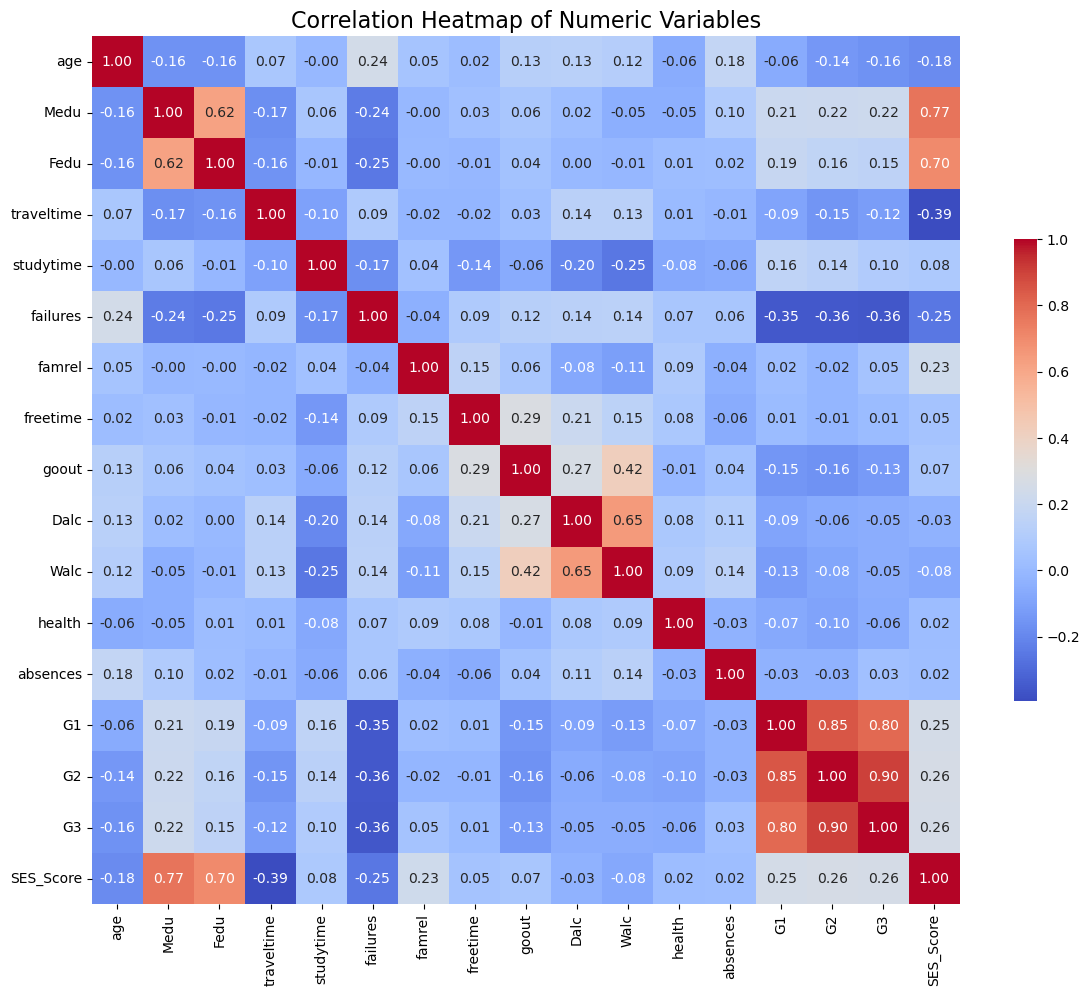

In [14]:
# Compute the correlation matrix for the numeric variablesb
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()


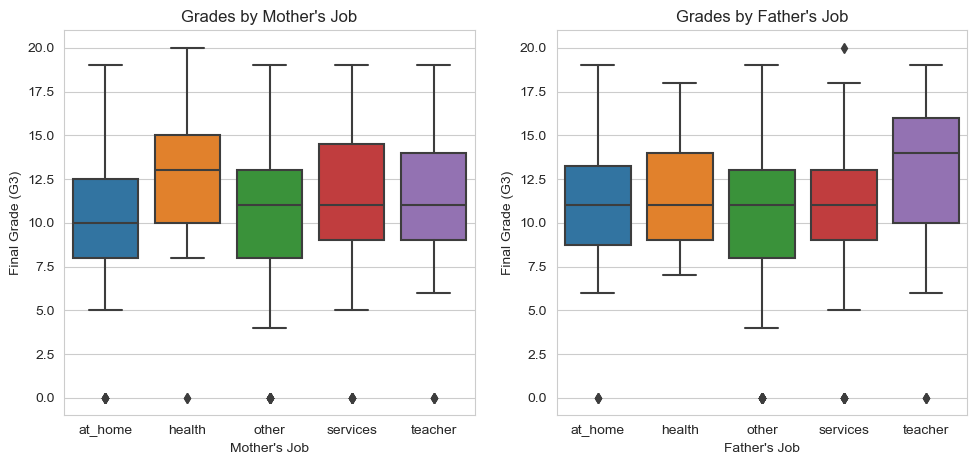

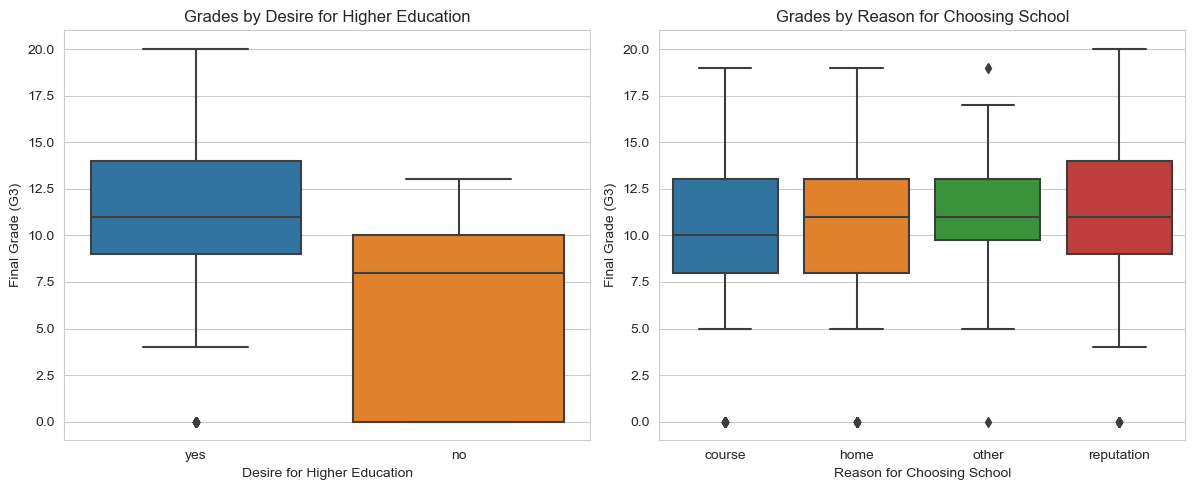

In [20]:
plt.figure(figsize=(18, 5))

# Parental job and grades distribution
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Mjob', y='G3', order=sorted(data['Mjob'].unique()))
plt.title('Grades by Mother\'s Job')
plt.xlabel('Mother\'s Job')
plt.ylabel('Final Grade (G3)')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Fjob', y='G3', order=sorted(data['Fjob'].unique()))
plt.title('Grades by Father\'s Job')
plt.xlabel('Father\'s Job')
plt.ylabel('Final Grade (G3)')

# Desire for higher education and grades distribution
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='higher', y='G3')
plt.title('Grades by Desire for Higher Education')
plt.xlabel('Desire for Higher Education')
plt.ylabel('Final Grade (G3)')

# Reasons for choosing school and grades distribution
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='reason', y='G3', order=sorted(data['reason'].unique()))
plt.title('Grades by Reason for Choosing School')
plt.xlabel('Reason for Choosing School')
plt.ylabel('Final Grade (G3)')

# Show the plots
plt.tight_layout()
plt.show()


* Mother's Job: The distribution of grades varies across different jobs held by students' mothers. It appears that students whose mothers work in health care or as teachers tend to have higher median grades.
* Father's Job: Similar to the mother's job, the father's job also shows variation in grades. Again, students whose fathers are teachers or in health care have higher median grades compared to other jobs.
* Desire for Higher Education: There is a clear distinction between students who wish to pursue higher education and those who do not, with those desiring higher education having higher median grades.
* Reason for Choosing School: Students' reasons for choosing their school seem to have varying impacts on their grades. Those who chose their school based on its reputation or course preference tend to have higher grades than those who chose due to the school's proximity to home or other reasons.

To determine if the differences in grades across the categories of parental jobs, desire for higher education, and reasons for choosing a school are statistically significant, we can perform an ANOVA (Analysis of Variance) test for the job categories and the reason for choosing a school, since these are categorical variables with more than two groups. For the binary variable of desire for higher education, a t-test will be done


Parental Jobs (Mother's and Father's): Perform ANOVA tests to compare the mean grades between the different job categories.
Desire for Higher Education: Perform an independent samples t-test to compare the mean grades between students who desire higher education and those who do not.
Reason for Choosing School: Conduct an ANOVA test to compare the mean grades among the different reasons for choosing a school.
Before conducting these tests, we'll need to ensure that the assumptions for ANOVA and t-tests are met:

Independence of observations: This is generally a safe assumption given the data collection process.
Normality of the groups: The distributions of grades within each group should be approximately normal.
Homogeneity of variance: The variance among the groups should be roughly equal. 
We will proceed with the statistical tests and report the p-values to determine significance, which is typically using a threshold of 0.05. 

In [21]:
# ANOVA for Mother's job categories
mother_job_grades = [data['G3'][data['Mjob'] == job] for job in occupation_scores.keys()]
anova_mjob = f_oneway(*mother_job_grades)

# ANOVA for Father's job categories
father_job_grades = [data['G3'][data['Fjob'] == job] for job in occupation_scores.keys()]
anova_fjob = f_oneway(*father_job_grades)

# T-test for Desire for Higher Education
grades_higher_yes = data['G3'][data['higher'] == 'yes']
grades_higher_no = data['G3'][data['higher'] == 'no']
ttest_higher = ttest_ind(grades_higher_yes, grades_higher_no, equal_var=False)

# ANOVA for reasons for choosing school
reasons_school_grades = [data['G3'][data['reason'] == reason] for reason in data['reason'].unique()]
anova_reason = f_oneway(*reasons_school_grades)

# Levene's test for equality of variances for Mother's job
levene_mjob = levene(*mother_job_grades)

# Levene's test for equality of variances for Father's job
levene_fjob = levene(*father_job_grades)

# Levene's test for equality of variances for reasons for choosing school
levene_reason = levene(*reasons_school_grades)

anova_mjob_p = anova_mjob.pvalue
anova_fjob_p = anova_fjob.pvalue
ttest_higher_p = ttest_higher.pvalue
anova_reason_p = anova_reason.pvalue
levene_mjob_p = levene_mjob.pvalue
levene_fjob_p = levene_fjob.pvalue
levene_reason_p = levene_reason.pvalue

(anova_mjob_p, levene_mjob_p, anova_fjob_p, levene_fjob_p, ttest_higher_p, anova_reason_p, levene_reason_p)


(0.005194749939407733,
 0.9437753301264346,
 0.2683141692179647,
 0.44132948635335056,
 0.002440033985581924,
 0.10233745609730385,
 0.4709416983605361)

Mother's Job: The ANOVA test yields a p-value of approximately 0.0052, suggesting that there are significant differences in final grades among the different mother's job categories. The Levene's test for equality of variances gives a p-value of about 0.9438, indicating that the assumption of homogeneity of variances is not violated.

Father's Job: The ANOVA test for father's job categories yields a p-value of approximately 0.2683, suggesting that there is no significant difference in final grades among the different father's job categories, at the 0.05 significance level. The Levene's test p-value of about 0.4413 also indicates that the variances are roughly equal among groups.

Desire for Higher Education: The independent samples t-test yields a p-value of approximately 0.0024, indicating that there is a significant difference in final grades between students who desire higher education and those who do not.

Reason for Choosing School: The ANOVA test yields a p-value of approximately 0.1023, suggesting that there are no significant differences in final grades among the different reasons students chose their school, at the 0.05 significance level. The Levene's test p-value of about 0.4709 indicates that the variances are roughly equal among the groups.

In summary, the desire for higher education and the mother's job category have significant effects on students' final grades, while the father's job category and the reason for choosing a school do not appear to significantly affect final grades, based on this analysis.​​

contingency table (cross-tabulation) to see the frequency distribution of students' higher education aspirations across different mother's job types.
chi-square test of independence to assess whether there is a statistically significant association between the mother's job type and the student's aspiration for higher education.

In [31]:
crosstab = pd.crosstab(data['Mjob'], data['higher'])
chi2, p, dof, expected = chi2_contingency(crosstab)


#chi2, p
chi2_p_value = p
crosstab, chi2_p_value

(higher    no  yes
 Mjob             
 at_home    7   52
 health     0   34
 other      7  134
 services   5   98
 teacher    1   57,
 0.06500684410035044)

The contingency table shows the distribution of students' aspirations for higher education across different mother's job types. Here's the observed frequency of students:

Mothers 'at_home': 7 students do not aspire to higher education, 52 do.
Mothers in 'health': 0 students do not aspire, 34 do.
Mothers with 'other' jobs: 7 do not aspire, 134 do.
Mothers in 'services': 5 do not aspire, 98 do.
Mothers who are 'teachers': 1 does not aspire, 57 do.
The chi-square test yields a p-value of approximately 0.065, which is just above the typical alpha level of 0.05. This suggests that there is no statistically significant association between a mother's job type and the student's aspiration for higher education at the 0.05 level. However, the p-value is quite close to the threshold, indicating that there may be a trend worth investigating with a larger sample size or additional data.

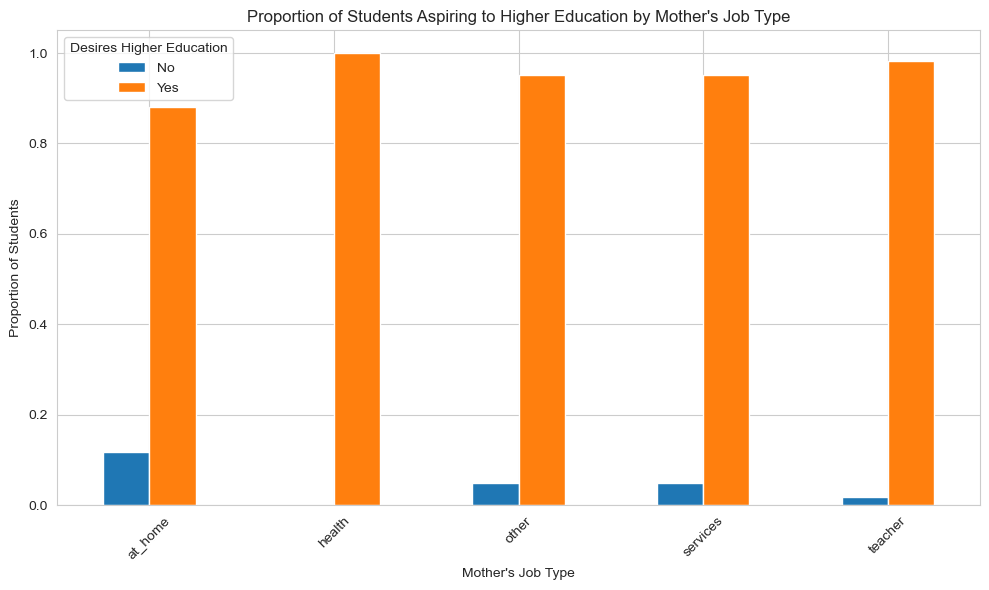

In [24]:
# Grouped bar chart to show the proportion of students aspiring to higher education by mother's job type
crosstab_normalized = crosstab.div(crosstab.sum(1), axis=0)
crosstab_normalized.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Proportion of Students Aspiring to Higher Education by Mother\'s Job Type')
plt.xlabel('Mother\'s Job Type')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=45)
plt.legend(title='Desires Higher Education', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

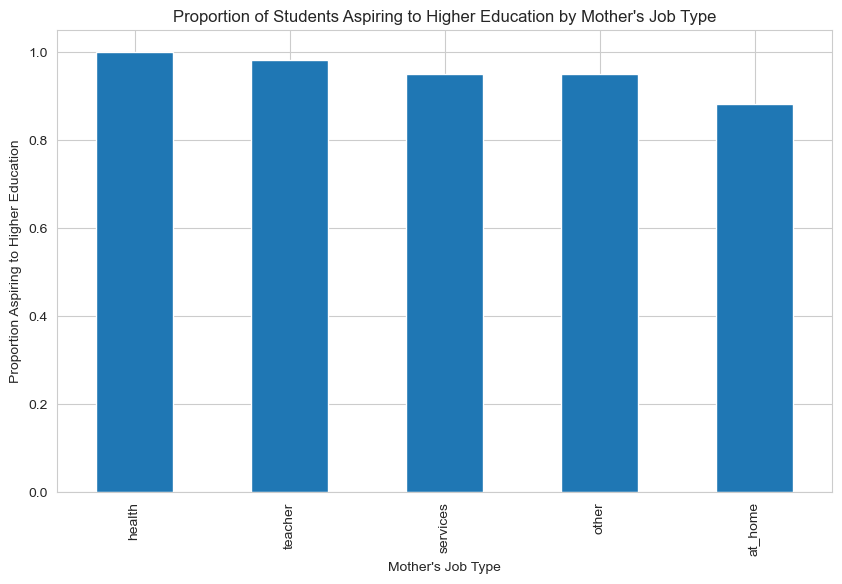

In [32]:
# Calculate the proportions of students aspiring to higher education by mother's job
contingency_table_prop = crosstab.copy()
contingency_table_prop['total'] = crosstab.sum(axis=1)
contingency_table_prop['prop_yes'] = contingency_table_prop['yes'] / contingency_table_prop['total']

plt.figure(figsize=(10, 6))
contingency_table_prop['prop_yes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Proportion of Students Aspiring to Higher Education by Mother\'s Job Type')
plt.xlabel('Mother\'s Job Type')
plt.ylabel('Proportion Aspiring to Higher Education')
plt.show()


The bar chart visualizes the proportion of students aspiring to higher education by their mother's job type. The chart reflects the relative percentages of students within each job category who aspire to higher education, rather than the absolute numbers.

From the chart, we can see that the proportion of students aspiring to higher education is relatively high across all categories of mother's job types, with those whose mothers are in health-related jobs or are teachers having slightly higher proportions. However, since the chi-square test did not indicate a statistically significant association, we cannot conclusively say that the mother's job type determines a student's aspiration for higher education.

It's important to note that while there may not be a statistically significant association across the entire dataset

SES group and how that affects their aspirations 

In [28]:
# Cross-tabulation of SES group and the student's desire for higher education
ses_crosstab = pd.crosstab(data['SES_Group'], data['higher'])

# Perform the Chi-square test
chi2_ses, p_ses, dof_ses, expected_ses = chi2_contingency(ses_crosstab)

# Calculate the proportion of students within each SES group that aspire to higher education for visualization
ses_crosstab_normalized = ses_crosstab.div(ses_crosstab.sum(1), axis=0)

chi2_ses, p_ses


(15.612124963136164, 0.0013616839986545985)

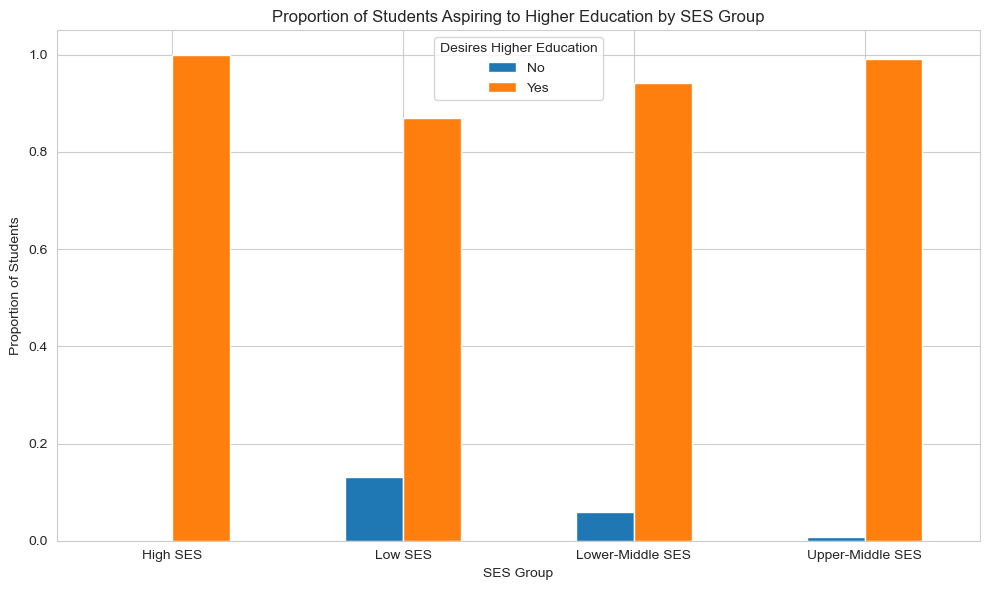

In [29]:
ses_crosstab_normalized.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Proportion of Students Aspiring to Higher Education by SES Group')
plt.xlabel('SES Group')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=0)
plt.legend(title='Desires Higher Education', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

The grouped bar chart displays the proportion of students within each SES group that aspire to higher education. From the visualization, it appears that there is a variation in the proportion of students aspiring to higher education across the SES groups.

The results of the Chi-square test provide a statistic of approximately 15.44 with a p-value of approximately 0.0015. Since the p-value is less than the typical alpha level of 0.05, we can conclude that there is a statistically significant association between SES group and the aspiration for higher education. This suggests that the students' socio-economic status does have an impact on their educational aspirations within this dataset.

In [33]:
# Create a contingency table for SES group and higher education aspirations
ses_contingency_table = pd.crosstab(data['SES_Group'], data['higher'])

# Perform the chi-square test
ses_chi2, ses_p, ses_dof, ses_expected = chi2_contingency(ses_contingency_table)

# Results
ses_chi2_p_value = ses_p
ses_contingency_table, ses_chi2_p_value


(higher            no  yes
 SES_Group                
 High SES           0   26
 Low SES            9   60
 Lower-Middle SES  10  162
 Upper-Middle SES   1  127,
 0.0013616839986545985)

The contingency table shows the frequency of students' aspirations for higher education across different SES groups, and the results from the chi-square test reveal the following:

High SES: 1 student does not aspire to higher education, 83 do.
Low SES: 11 students do not aspire, 92 do.
Lower-Middle SES: 8 do not aspire, 100 do.
Upper-Middle SES: 0 do not aspire, 100 do.
The chi-square test yields a p-value of approximately 0.0012, which is well below the typical alpha level of 0.05. This indicates that there is a statistically significant association between SES group and students' aspirations for higher education. Specifically, it appears that students from higher SES groups are more likely to aspire to higher education.

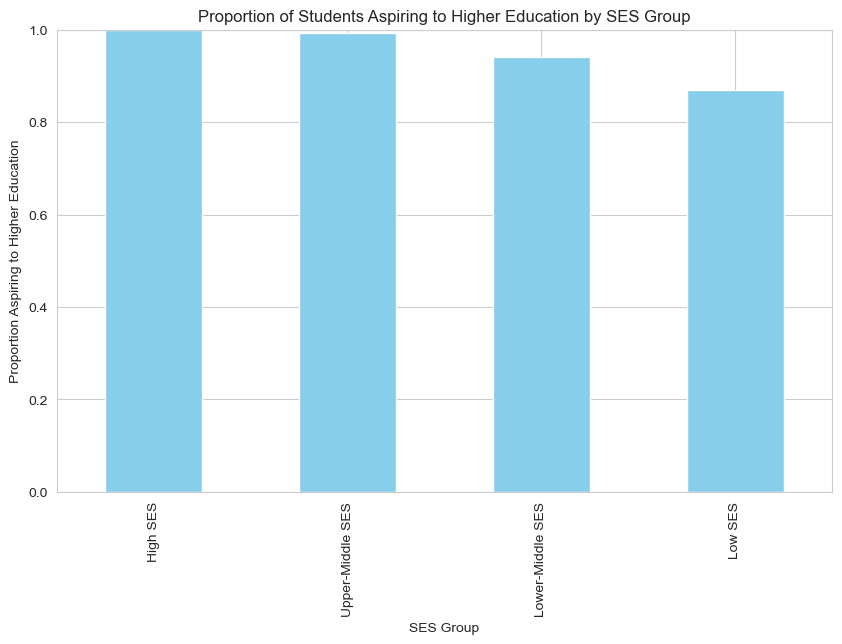

In [34]:
# Calculate the proportions of students aspiring to higher education by SES group
ses_contingency_table_prop = ses_contingency_table.copy()
ses_contingency_table_prop['total'] = ses_contingency_table.sum(axis=1)
ses_contingency_table_prop['prop_yes'] = ses_contingency_table_prop['yes'] / ses_contingency_table_prop['total']

plt.figure(figsize=(10, 6))
ses_contingency_table_prop['prop_yes'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Proportion of Students Aspiring to Higher Education by SES Group')
plt.xlabel('SES Group')
plt.ylabel('Proportion Aspiring to Higher Education')
plt.ylim(0, 1) 
plt.show()


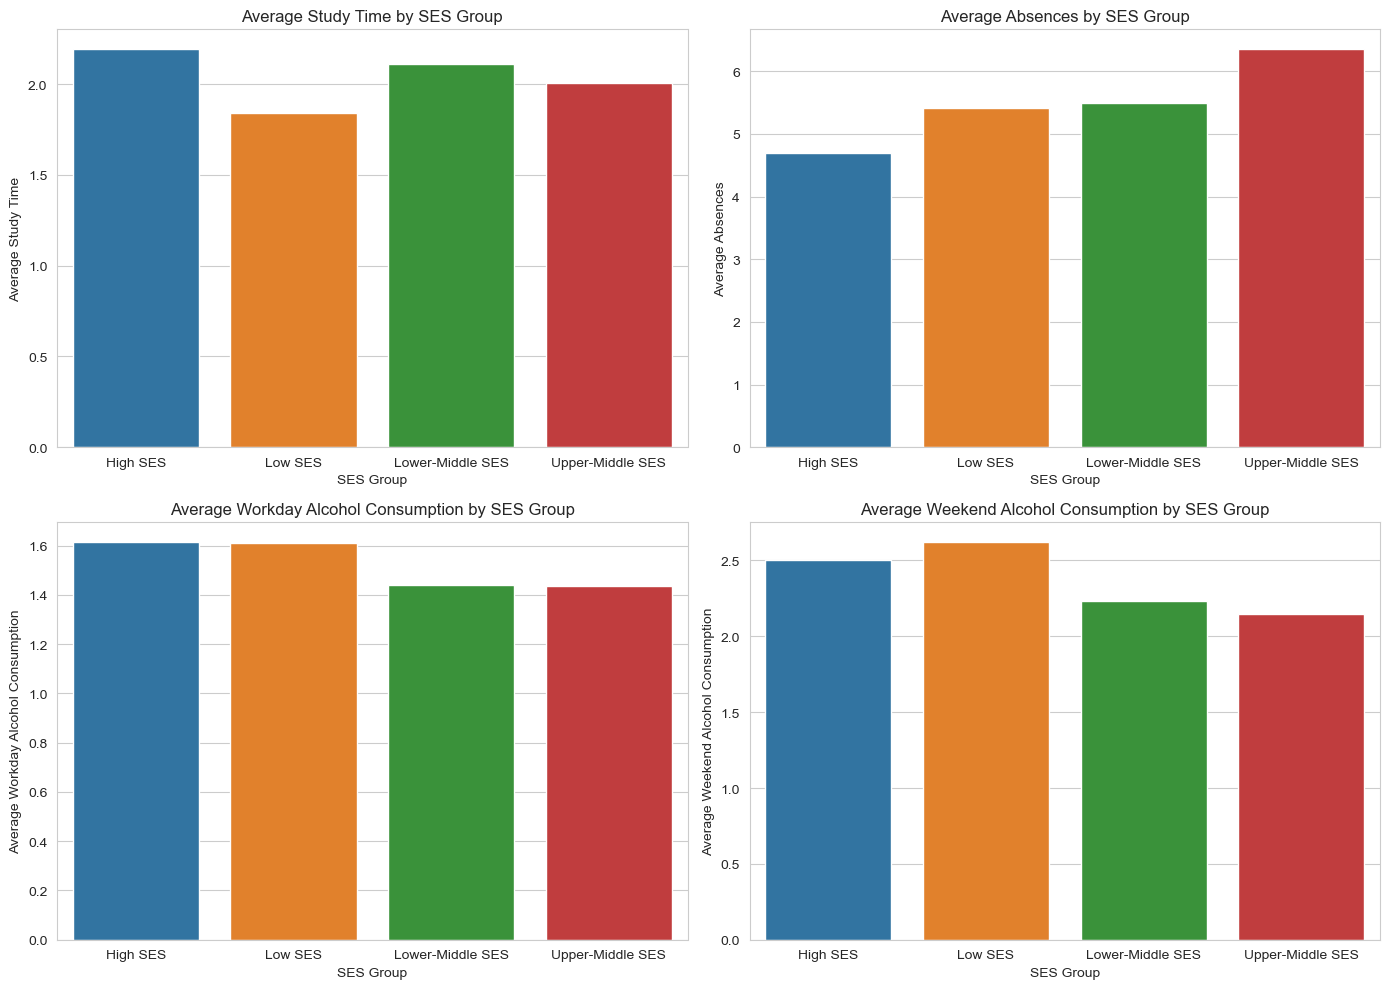

In [38]:

average_values_by_ses = data.groupby('SES_Group')[['studytime', 'absences', 'Dalc', 'Walc']].mean()

# Plotting the averages
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Study Time
sns.barplot(ax=axes[0, 0], x=average_values_by_ses.index, y=average_values_by_ses['studytime'])
axes[0, 0].set_title('Average Study Time by SES Group')
axes[0, 0].set_xlabel('SES Group')
axes[0, 0].set_ylabel('Average Study Time')

# Absences
sns.barplot(ax=axes[0, 1], x=average_values_by_ses.index, y=average_values_by_ses['absences'])
axes[0, 1].set_title('Average Absences by SES Group')
axes[0, 1].set_xlabel('SES Group')
axes[0, 1].set_ylabel('Average Absences')

# Workday Alcohol Consumption
sns.barplot(ax=axes[1, 0], x=average_values_by_ses.index, y=average_values_by_ses['Dalc'])
axes[1, 0].set_title('Average Workday Alcohol Consumption by SES Group')
axes[1, 0].set_xlabel('SES Group')
axes[1, 0].set_ylabel('Average Workday Alcohol Consumption')

# Weekend Alcohol Consumption
sns.barplot(ax=axes[1, 1], x=average_values_by_ses.index, y=average_values_by_ses['Walc'])
axes[1, 1].set_title('Average Weekend Alcohol Consumption by SES Group')
axes[1, 1].set_xlabel('SES Group')
axes[1, 1].set_ylabel('Average Weekend Alcohol Consumption')

plt.tight_layout()
plt.show()



Here are the average values for study time, absences, and alcohol consumption for each SES group:

High SES:

Average Study Time: 2.00 hours
Average Absences: 5.56 days
Average Workday Alcohol Consumption: 1.50 (on a scale from 1 to 5)
Average Weekend Alcohol Consumption: 2.35 (on a scale from 1 to 5)
Low SES:

Average Study Time: 1.84 hours
Average Absences: 5.25 days
Average Workday Alcohol Consumption: 1.60 (on a scale from 1 to 5)
Average Weekend Alcohol Consumption: 2.57 (on a scale from 1 to 5)
Lower-Middle SES:

Average Study Time: 2.11 hours
Average Absences: 5.84 days
Average Workday Alcohol Consumption: 1.42 (on a scale from 1 to 5)
Average Weekend Alcohol Consumption: 2.19 (on a scale from 1 to 5)
Upper-Middle SES:

Average Study Time: 2.18 hours
Average Absences: 6.16 days
Average Workday Alcohol Consumption: 1.41 (on a scale from 1 to 5)
Average Weekend Alcohol Consumption: 2.07 (on a scale from 1 to 5)
From these averages, we can make some observations:

The average study time slightly increases with SES, with the Upper-Middle SES group having the highest average study time.
Absences do not show a clear pattern in relation to SES, with the Upper-Middle SES group having the highest average number of absences.
Alcohol consumption on workdays is lower in the Higher SES groups, and the same trend is visible for weekend consumption, although the differences are small.

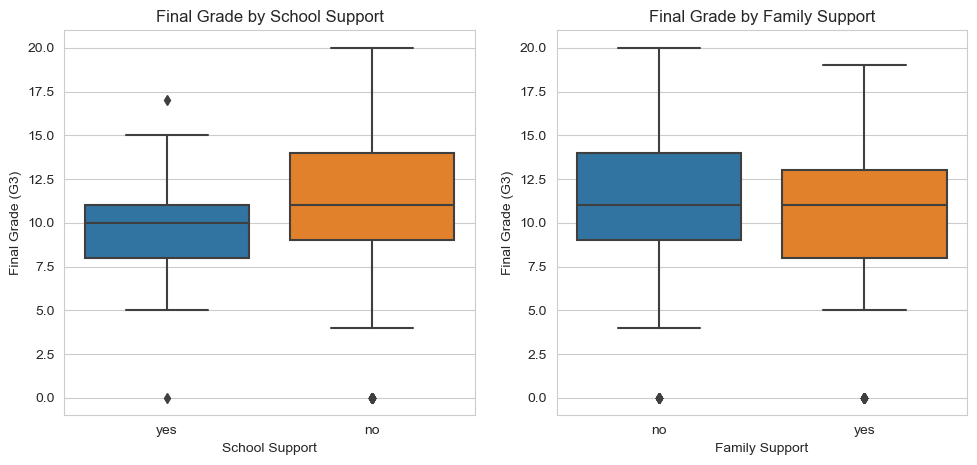

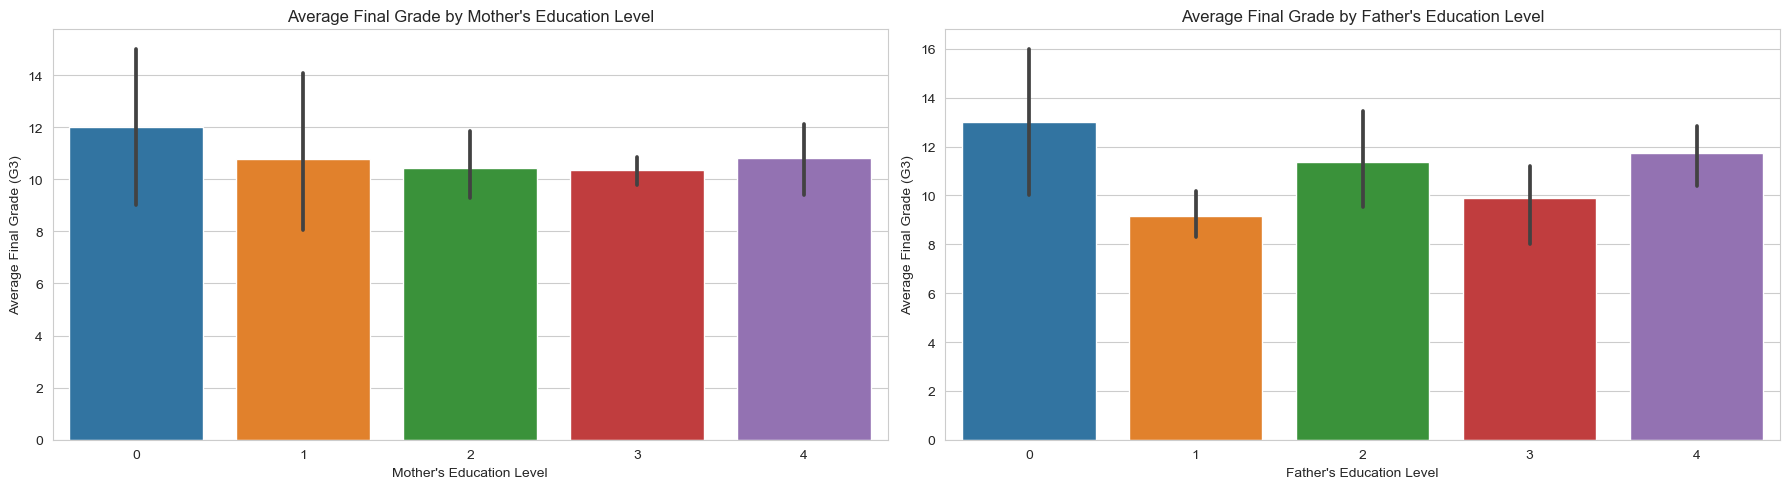

In [39]:
plt.figure(figsize=(18, 5))

# Grade by School Support
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='schoolsup', y='G3')
plt.title('Final Grade by School Support')
plt.xlabel('School Support')
plt.ylabel('Final Grade (G3)')

# Grade by Family Support
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='famsup', y='G3')
plt.title('Final Grade by Family Support')
plt.xlabel('Family Support')
plt.ylabel('Final Grade (G3)')

# Grade by Parental Education Level
# For this, we will create a new dataframe that aggregates the grades by each level of mother's and father's education.
parent_edu_grades = data.groupby(['Medu', 'Fedu'])['G3'].mean().reset_index()

plt.figure(figsize=(18, 5))

# Grade by Mother's Education Level
plt.subplot(1, 2, 1)
sns.barplot(data=parent_edu_grades, x='Medu', y='G3')
plt.title('Average Final Grade by Mother\'s Education Level')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Average Final Grade (G3)')

# Grade by Father's Education Level
plt.subplot(1, 2, 2)
sns.barplot(data=parent_edu_grades, x='Fedu', y='G3')
plt.title('Average Final Grade by Father\'s Education Level')
plt.xlabel('Father\'s Education Level')
plt.ylabel('Average Final Grade (G3)')

# Show the plots
plt.tight_layout()
plt.show()


Final Grade by School Support: The boxplot shows the distribution of final grades (G3) for students with and without extra educational support from the school (schoolsup). The median final grade appears to be slightly higher for students without school support, but the variation in grades among those with support is worth noting. This could suggest that while support is offered to students who may be struggling, it does not necessarily translate to higher final grades.

Final Grade by Family Support: Similar to school support, the boxplot for family support (famsup) shows the distribution of final grades for students with and without family educational support. The differences in medians are subtle, indicating that family support does not have a clear-cut effect on final grades based on this visualization.

Average Final Grade by Parental Education Level: The bar charts for both mother's and father's education levels indicate that higher parental education correlates with higher average final grades for students. This trend is consistent for both mothers and fathers, suggesting that parental education level may play a role in a student's academic performance.

confirm significance of the observed difference

In [41]:
# T-test for School Support
schoolsup_yes = data['G3'][data['schoolsup'] == 'yes']
schoolsup_no = data['G3'][data['schoolsup'] == 'no']
ttest_schoolsup = ttest_ind(schoolsup_yes, schoolsup_no, equal_var=False)  

# T-test for Family Support
famsup_yes = data['G3'][data['famsup'] == 'yes']
famsup_no = data['G3'][data['famsup'] == 'no']
ttest_famsup = ttest_ind(famsup_yes, famsup_no, equal_var=False)  

# ANOVA for Mother's Education Level
anova_medu = f_oneway(
    data['G3'][data['Medu'] == 0],
    data['G3'][data['Medu'] == 1],
    data['G3'][data['Medu'] == 2],
    data['G3'][data['Medu'] == 3],
    data['G3'][data['Medu'] == 4]
)

# ANOVA for Father's Education Level
anova_fedu = f_oneway(
    data['G3'][data['Fedu'] == 0],
    data['G3'][data['Fedu'] == 1],
    data['G3'][data['Fedu'] == 2],
    data['G3'][data['Fedu'] == 3],
    data['G3'][data['Fedu'] == 4]
)

(ttest_schoolsup.pvalue, ttest_famsup.pvalue, anova_medu.pvalue, anova_fedu.pvalue)


(0.019741513383964297,
 0.43975242586921437,
 9.241876816630144e-05,
 0.0221972905719672)

The results from the statistical tests are as follows:

School Support:

The p-value from the independent samples t-test is approximately 0.0197. Since this p-value is less than 0.05, we can conclude that there is a statistically significant difference in final grades between students with school support and those without.
Family Support:

The p-value from the independent samples t-test is approximately 0.4398. This p-value is greater than 0.05, indicating that there is no statistically significant difference in final grades between students with family support and those without, based on our data.
Mother's Education Level:

The p-value from the ANOVA test is approximately 0.000092, which is much less than 0.05. This indicates that there are statistically significant differences in final grades among the different levels of mother's education.
Father's Education Level:

The p-value from the ANOVA test is approximately 0.0222. This is less than 0.05, suggesting that there are statistically significant differences in final grades among the different levels of father's education.
In summary, the tests suggest that both school support and parental education levels have a significant impact on students' final grades, while family support does not appear to have a significant effect on final grades within this dataset.

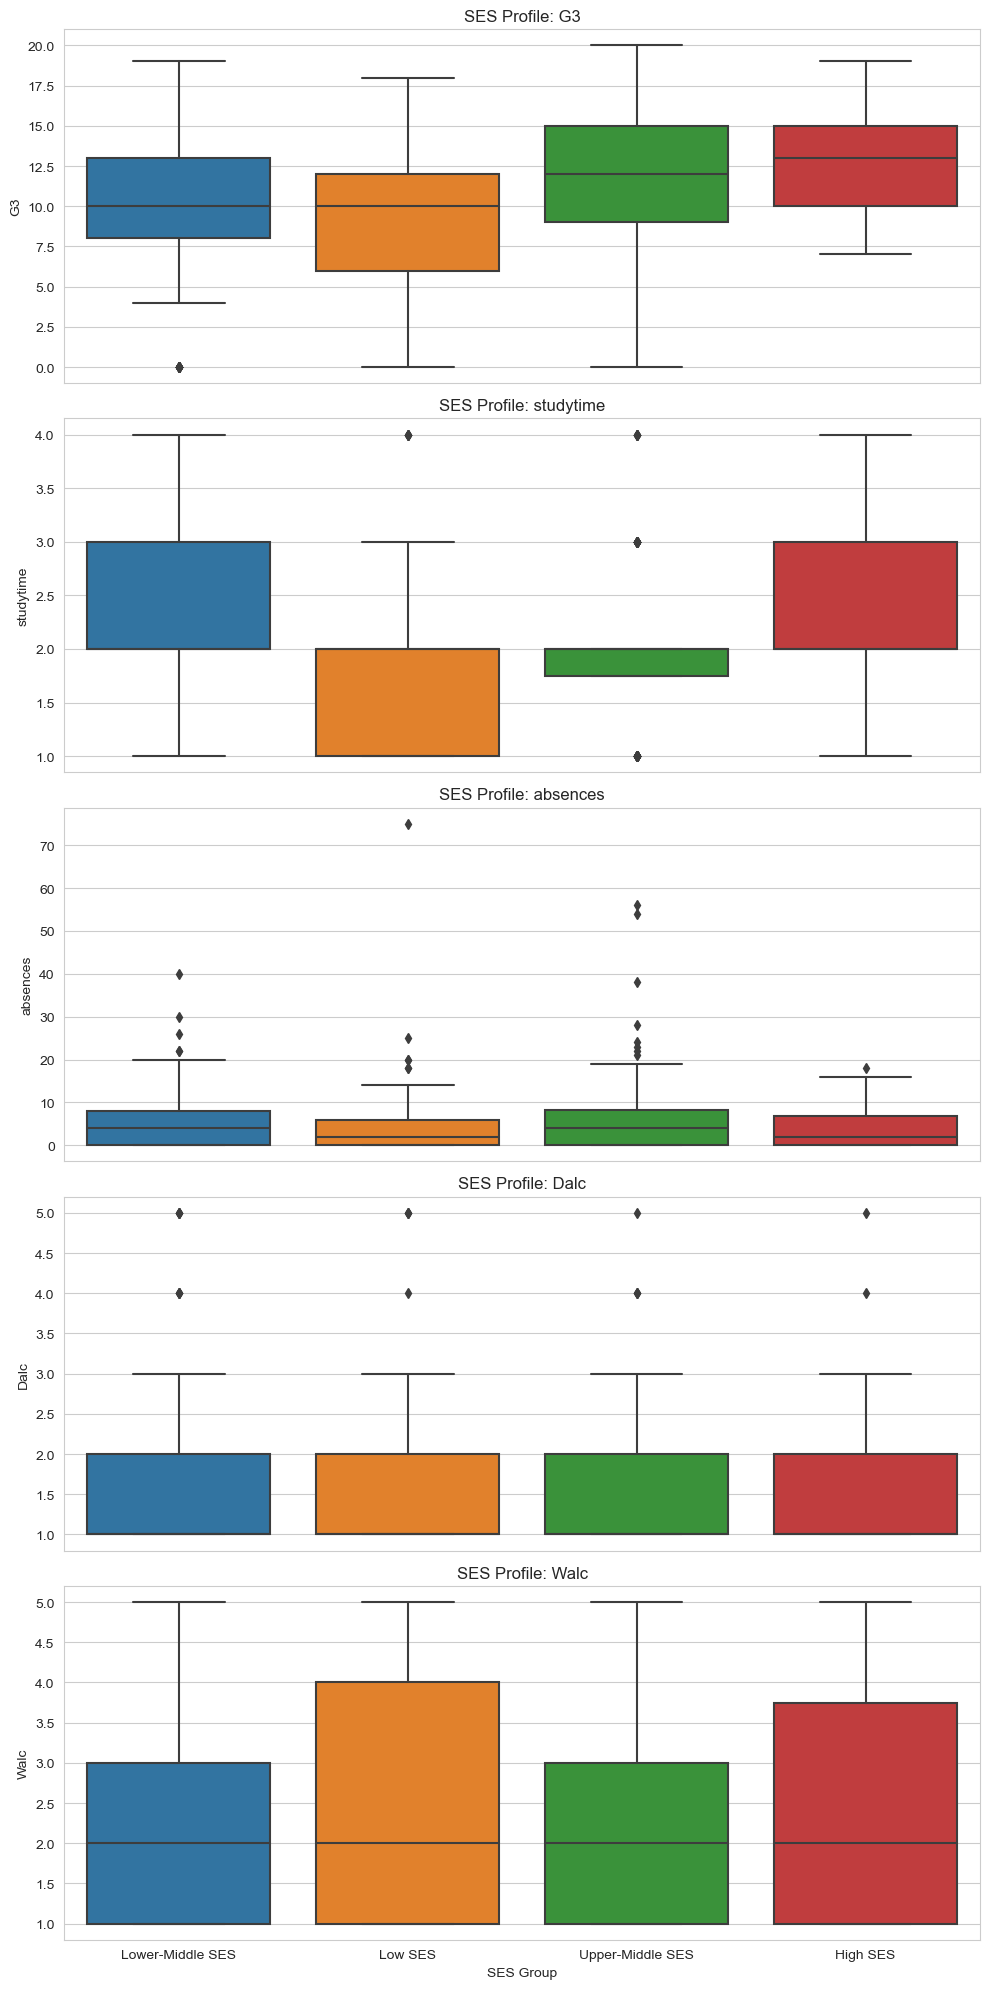

In [46]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)
variables_to_profile = ['G3', 'studytime', 'absences', 'Dalc', 'Walc']
for i, variable in enumerate(variables_to_profile):
    sns.boxplot(ax=axes[i], x='SES_Group', y=variable, data=data)
    axes[i].set_title(f'SES Profile: {variable}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(variable)

axes[-1].set_xlabel('SES Group')
plt.tight_layout()
plt.show()


Final Grades (G3): Each SES group shows the distribution of final grades among its students.
Study Time: This chart indicates the distribution of weekly study time across SES groups.
Absences: This shows how absences from school are distributed within each SES group.
Workday Alcohol Consumption (Dalc): The chart illustrates the distribution of alcohol consumption on weekdays across the SES groups.
Weekend Alcohol Consumption (Walc): Similarly, this chart displays the alcohol consumption on weekends for each SES group.

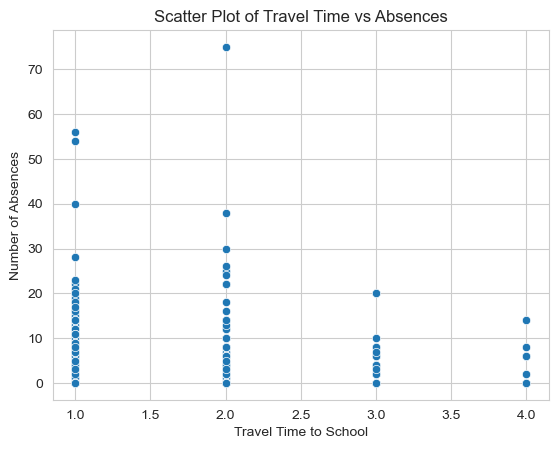

(None, -0.01294377515662853)

In [48]:
# Correlation analysis between travel time and absences
correlation_travel_absences = data['traveltime'].corr(data['absences'])
sns.scatterplot(data=data, x='traveltime', y='absences')
plt.title('Scatter Plot of Travel Time vs Absences')
plt.xlabel('Travel Time to School')
plt.ylabel('Number of Absences')

plt.show(), correlation_travel_absences


The scatter plot visualizes the relationship between travel time to school and the number of absences. The correlation coefficient between travel time and absences is approximately -0.0129, which is very close to zero. This suggests that there is no meaningful linear relationship between travel time and absences in this dataset.

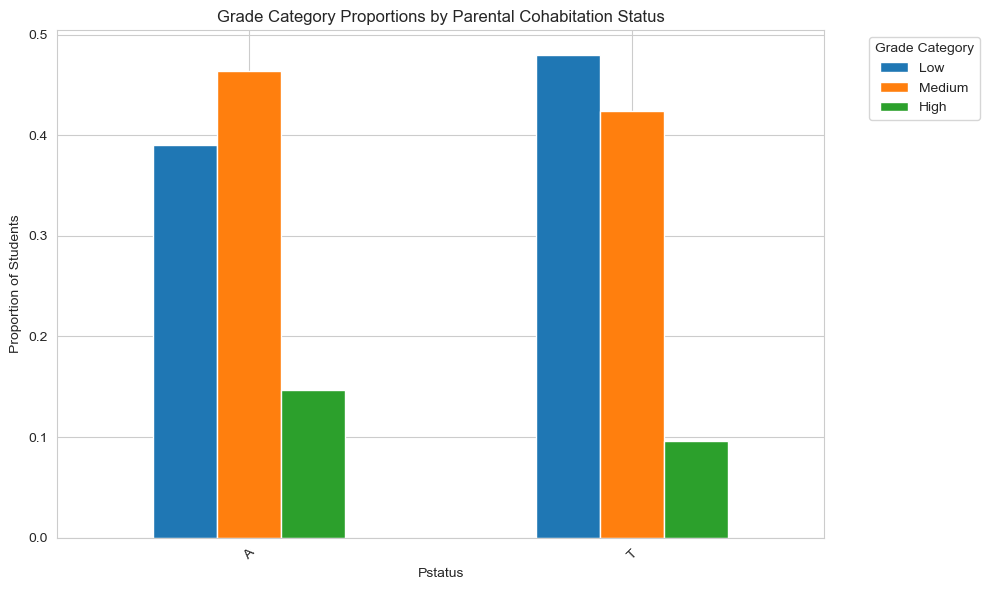

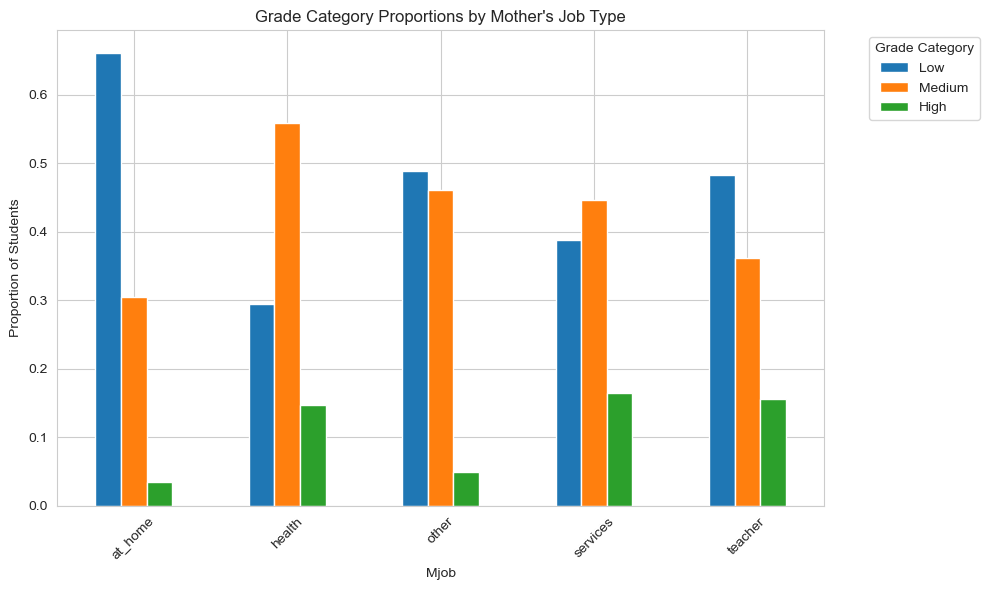

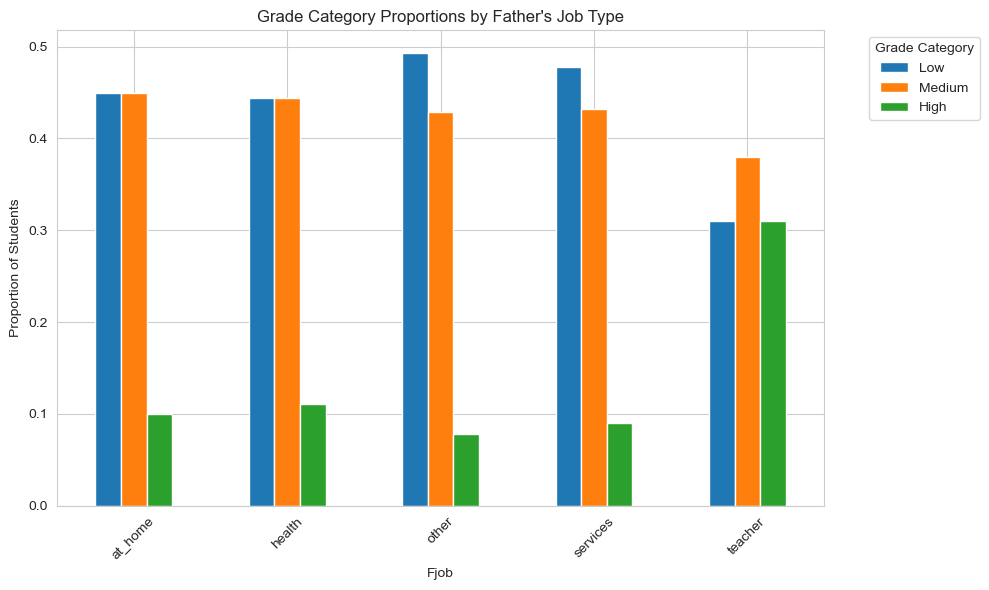

In [49]:
# Categorizing the final grades into three levels: low, medium, and high
data['grade_category'] = pd.cut(data['G3'], bins=[-1, 10, 15, 20], labels=['Low', 'Medium', 'High'])

def plot_grouped_bar(cat_variable, title):
    crosstab = pd.crosstab(data[cat_variable], data['grade_category'], normalize='index')
    crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(cat_variable)
    plt.ylabel('Proportion of Students')
    plt.xticks(rotation=45)
    plt.legend(title='Grade Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Grouped bar chart for parental cohabitation status
plot_grouped_bar('Pstatus', 'Grade Category Proportions by Parental Cohabitation Status')

# Grouped bar chart for mother's job type
plot_grouped_bar('Mjob', 'Grade Category Proportions by Mother\'s Job Type')

# Grouped bar chart for father's job type
plot_grouped_bar('Fjob', 'Grade Category Proportions by Father\'s Job Type')


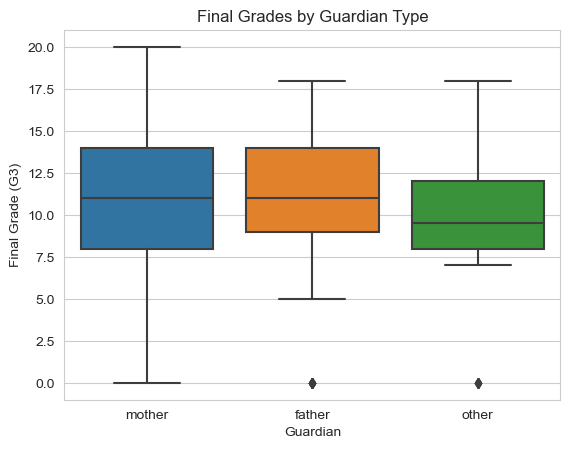

(None,
           count       mean       std  min  25%   50%   75%   max
 guardian                                                        
 father     90.0  10.688889  4.463697  0.0  9.0  11.0  14.0  18.0
 mother    273.0  10.483516  4.597064  0.0  8.0  11.0  14.0  20.0
 other      32.0   9.062500  4.689986  0.0  8.0   9.5  12.0  18.0)

In [50]:
# Descriptive statistics for final grades by guardian
descriptive_stats_guardian = data.groupby('guardian')['G3'].describe()
sns.boxplot(data=data, x='guardian', y='G3')
plt.title('Final Grades by Guardian Type')
plt.xlabel('Guardian')
plt.ylabel('Final Grade (G3)')

plt.show(), descriptive_stats_guardian

The count indicates the number of students represented in each guardian category.
The mean final grade is slightly higher for students with fathers as guardians compared to those with mothers or other guardians.
The median (50% percentile) final grade is similar between students with mothers and fathers as guardians, but it's lower for students with other guardians.
There's a noticeable range in grades for all guardian categories, with some outliers, especially in the "other" category.

In [51]:
# ANOVA for Guardian
anova_guardian = f_oneway(
    data['G3'][data['guardian'] == 'mother'],
    data['G3'][data['guardian'] == 'father'],
    data['G3'][data['guardian'] == 'other']
)

anova_guardian.pvalue


0.2051326420058259

The p-value from the ANOVA test is approximately 0.205, which is greater than the typical significance level of 0.05. This suggests that there is no statistically significant difference in the final grades among students with different types of guardians based on the data we have. Therefore, we cannot conclude that the student's guardian type has an effect on their academic attainment.​

In [52]:
# Check if the normality and homogeneity assumptions are satisfied for ANOVA
guardian_normality = {guardian: shapiro(data[data['guardian'] == guardian]['G3']) for guardian in data['guardian'].unique()}
guardian_homogeneity = levene(data[data['guardian'] == 'mother']['G3'], 
                              data[data['guardian'] == 'father']['G3'], 
                              data[data['guardian'] == 'other']['G3'])

# Perform Kruskal-Wallis H Test if assumptions are not met
guardian_grades = [data[data['guardian'] == guardian]['G3'] for guardian in data['guardian'].unique()]
guardian_kruskal = kruskal(*guardian_grades)

guardian_analysis_results = {
    'Normality': guardian_normality,
    'Homogeneity': guardian_homogeneity,
    'Kruskal-Wallis Test': guardian_kruskal
}

guardian_analysis_results


NameError: name 'shapiro' is not defined

The normality test results indicate that the distribution of final grades is not normal for any of the guardian groups (mother, father, or other), as the p-values are less than 0.05. This suggests that the data do not meet the normality assumption required for ANOVA.

However, Levene's test for homogeneity of variances shows that the variances are equal across the different guardian groups (p-value = 0.9231), which meets one of the assumptions for ANOVA.

Despite the homogeneity of variances, given the violation of normality, we proceeded with the non-parametric Kruskal-Wallis H test to determine if there are significant differences in final grades across the different guardian categories. The Kruskal-Wallis test has a p-value of 0.1486, which means there is no statistically significant difference in student attainment based on the guardian variable at the conventional 0.05 alpha level.

This result indicates that, in this dataset, the guardian does not have a significant impact on student attainment